<a href="https://colab.research.google.com/github/AlexMtnkv/machine-learning/blob/main/StarWars(Work3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

берем файлы из папки "принцесса лея" и даем им класс 0
берем файлы из папки "чубакка" и даем им класс 1
берем файлы из папки "дарт вейдер" и даем им класс 2
берем файлы из папки "люк скайуокер" и даем им класс 3
Всего батчей по batch_size: 3
Лейбл первого элемента в первом батче: 2
Размер картинки в первом батче: torch.Size([3, 224, 224])
Картинка в первом батче: tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 

  0%|          | 0/25 [00:00<?, ?it/s]

epoch 0


  4%|▍         | 1/25 [00:04<01:49,  4.57s/it]

epoch 1


  8%|▊         | 2/25 [00:09<01:44,  4.54s/it]

epoch 2


 12%|█▏        | 3/25 [00:13<01:37,  4.44s/it]

epoch 3


 16%|█▌        | 4/25 [00:17<01:32,  4.41s/it]

epoch 4


 20%|██        | 5/25 [00:21<01:26,  4.33s/it]

epoch 5


 24%|██▍       | 6/25 [00:26<01:26,  4.55s/it]

epoch 6


 28%|██▊       | 7/25 [00:32<01:26,  4.80s/it]

epoch 7


 32%|███▏      | 8/25 [00:36<01:18,  4.60s/it]

epoch 8


 36%|███▌      | 9/25 [00:40<01:12,  4.51s/it]

epoch 9


 40%|████      | 10/25 [00:44<01:06,  4.41s/it]

epoch 10


 44%|████▍     | 11/25 [00:48<01:00,  4.31s/it]

epoch 11


 48%|████▊     | 12/25 [00:52<00:54,  4.20s/it]

epoch 12


 52%|█████▏    | 13/25 [00:57<00:50,  4.20s/it]

epoch 13


 56%|█████▌    | 14/25 [01:01<00:46,  4.20s/it]

epoch 14


 60%|██████    | 15/25 [01:05<00:41,  4.19s/it]

epoch 15


 64%|██████▍   | 16/25 [01:09<00:38,  4.24s/it]

epoch 16


 68%|██████▊   | 17/25 [01:13<00:33,  4.18s/it]

epoch 17


 72%|███████▏  | 18/25 [01:17<00:28,  4.12s/it]

epoch 18


 76%|███████▌  | 19/25 [01:22<00:24,  4.15s/it]

epoch 19


 80%|████████  | 20/25 [01:26<00:20,  4.13s/it]

epoch 20


 84%|████████▍ | 21/25 [01:30<00:16,  4.14s/it]

epoch 21


 88%|████████▊ | 22/25 [01:34<00:12,  4.19s/it]

epoch 22


 92%|█████████▏| 23/25 [01:38<00:08,  4.15s/it]

epoch 23


 96%|█████████▌| 24/25 [01:42<00:04,  4.16s/it]

epoch 24


100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


Epoch 24 test accuracy 0.3125


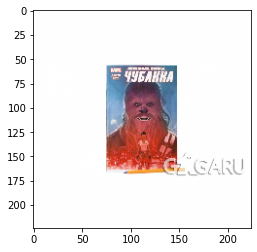

In [6]:
import numpy as np
import torch
import os
import cv2
import io
from googleapiclient.http import MediaIoBaseDownload
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet34
from google.colab import auth
from googleapiclient.discovery import build
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


class StarWarsDataset(Dataset):
    def __init__(self, filenames, labels):
        self._filenames = filenames
        self._labels = labels

    def __len__(self):
        return len(self._filenames)

    def __getitem__(self, idx):
        filename = self._filenames[idx]
        label = self._labels[idx]
        
        img = cv2.imread(filename)[:, :, ::-1]

        img = resize(add_pad(img))
        plt.imshow(img)
        
        img = torch.tensor(img, dtype=torch.float).permute(2, 0, 1) / 255.
        return img, label


def download_data(file_id, file_name):
    request = drive_service.files().get_media(fileId=file_id)
    downloaded = io.BytesIO()
    downloader = MediaIoBaseDownload(downloaded, request)
    done = False
    while done is False:
        _, done = downloader.next_chunk()

    downloaded.seek(0)
    with open(file_name, "wb") as f:
        f.write(downloaded.read())

def add_pad(img):
    color_pick = img[0][0]
    sh = max(img.shape[0], img.shape[1])
    shape = (sh, sh)
    padded_img = color_pick * np.ones(shape + img.shape[2:3], dtype=np.uint8)
    x_offset = int((padded_img.shape[0] - img.shape[0]) / 2)
    y_offset = int((padded_img.shape[1] - img.shape[1]) / 2)

    if img.shape[0] > img.shape[1]:
        padded_img[x_offset:img.shape[0], y_offset:y_offset + img.shape[1]] = img
        return padded_img

    elif img.shape[0] < img.shape[1]:
        padded_img[x_offset:x_offset + img.shape[0], y_offset:img.shape[1]] = img
        return padded_img    

    else:
        return img

def resize(img):
    shape = (224, 224)
    scale = min(shape[0] * 1.0 / img.shape[0], shape[1] * 1.0 / img.shape[1])
    if scale != 1:
        img = cv2.resize(img,
                         dsize=None,
                         fx=scale,
                         fy=scale,
                         interpolation=cv2.INTER_LINEAR)

    return img

def run_test_on_epoch(model, epoch, test_loader):
    model.eval()
    with torch.no_grad():
      test_accuracy = []
      test_real = []
      for batch_x, batch_y in tqdm(test_loader):
          outputs = model(batch_x.to('cuda')).detach().cpu().numpy()
          test_accuracy.append(outputs)
          test_real.append(batch_y.detach().cpu().numpy())
      print("Epoch", epoch, "test accuracy", accuracy_score(np.hstack(test_real), np.argmax(np.hstack(test_accuracy), axis=1)))
    model.train()


if __name__=="__main__":
    auth.authenticate_user()
    drive_service = build('drive', 'v3')

    file_id = '139wA_Z9kustXy54ifhWWHJvARo5f7O6y'
    file_name = 'star_wars.tar.gz'

    download_data(file_id, file_name)
    !tar xf star_wars.tar.gz

    filenames = []
    labels = []
    for idx, class_dir in enumerate(os.listdir("star_wars")):
        print(f"берем файлы из папки \"{class_dir}\" и даем им класс {idx}")
  
        for file in os.listdir(os.path.join("star_wars", class_dir)):
            if not file.endswith(('.jpg', '.jpeg', '.png')):
                continue
      
            filenames.append(os.path.join("star_wars", class_dir, file))
            labels.append(idx)

    train_filenames, test_filenames, train_labels, test_labels = train_test_split(filenames,
                                                                                  labels,
                                                                                  train_size=0.7,
                                                                                  test_size=0.3)

    train_dataset = StarWarsDataset(train_filenames,
                                    train_labels)
    
    train_dataloder = DataLoader(train_dataset,
                                 shuffle=True, 
                                 batch_size=64, 
                                 num_workers=0,
                                 drop_last=True)

    test_dataset = StarWarsDataset(test_filenames,
                                   test_labels)
    
    test_dataloder = DataLoader(test_dataset,
                                shuffle=True,
                                batch_size=64,
                                num_workers=0,
                                drop_last=True)

    for batch in test_dataloder:
        images, labels = batch  
        print(f'Всего батчей по batch_size: {len(train_dataloder)}')
        print(f'Лейбл первого элемента в первом батче: {labels[0]}')
        print(f'Размер картинки в первом батче: {images[0].shape}')
        print(f'Картинка в первом батче: {images[0]}')
        break

    model = resnet34(pretrained=True)
    for param in model.parameters():
        param.requires_grad=False

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
    
    if torch.cuda.is_available():
        device = "cuda:0"
    else:
        device = "cpu"

    num_ftrs = model.fc.in_features
    model.fc = torch.nn.Linear(num_ftrs, 4)
    model.to(device)

    for epoch in tqdm(range(25)):
        print('epoch', epoch)
        for (images, labels) in (train_dataloder): 
            phase='train'
            images=images.to(device)
            labels=labels.to(device)
            optimizer.zero_grad()
            with torch.set_grad_enabled(phase=='train'):
                outputs = model(images)
                _,preds=torch.max(outputs,1)
                loss=criterion(outputs,labels)
                loss.backward()
                optimizer.step()

    run_test_on_epoch(model, epoch, test_dataloder) 

